In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# création de données synthétiques

$f(t)_{[t_i, M]} = e^{- \frac{t-t_i}{\tau}} \sin(2 \pi  f_i  (t-t_i))$

$f_i$ = fréquence

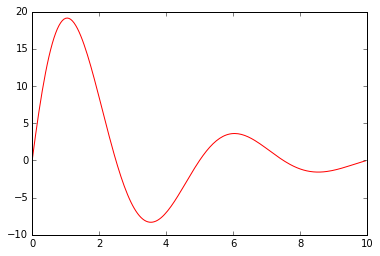

In [2]:
f_i = 0.2
tau = 3
t_i = 10
t = np.arange(0, 10, 0.05)

plt.plot(t, np.exp(-(t-t_i)/tau)*np.sin(2*np.pi*f_i*(t-t_i)), c='r')

In [3]:
def donnee_s (t, f_i=0.2, tau=3, t_i=10) :
    return np.exp(-(t-t_i)/tau)*np.sin(2*np.pi*f_i*(t-t_i))

In [4]:
t = np.arange(0, 128, 0.05)
x = 0
signaux= []
while x < 128 :
    t_donnee = np.arange(0, 16, 0.05)
    for a in t_donnee :
        signaux.append(donnee_s(a))
    x = x + 16

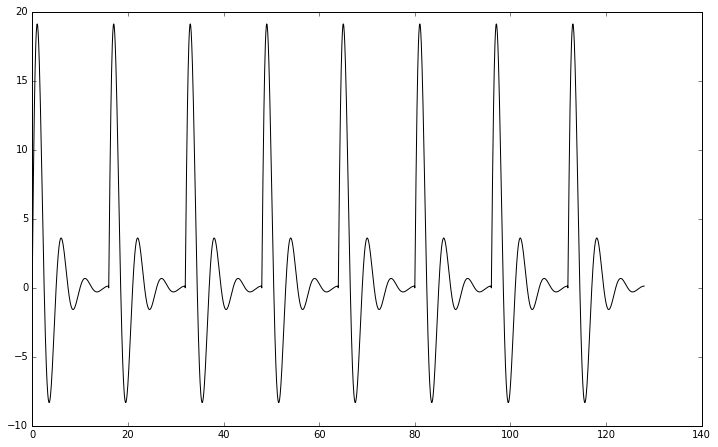

In [5]:
fig, ax = plt.subplots(1, 1, figsize=(12, (12/1.6180)))
ax.plot(t, signaux, c='k')

# Test MP

tant que $r_t$ > seuil :
- $i^*$ = Argmax($c_i$)
- $c_i$ <- $c_i$ - $c_{i^*}$<$\phi_{i^*}$, $\phi_i$> 

In [6]:
def fct_MP (signaux, phi_i, seuil) :
    r_t = signaux
    
    liste_i = []
    liste_c = []
    liste_a = []
    liste_phi = []
    liste_a_phi = []
    liste_norm_rt = []
    liste_rt =[]
    
    while np.linalg.norm(r_t) > seuil  :
        c_i=[]
        c_abs = []
        for i in range(np.shape(phi_i)[0]) :
            c_i.append(np.vdot(r_t,phi_i[i]))
            c_abs.append(abs(np.vdot(r_t,phi_i[i])))

        i_star = np.argmax(c_abs)        
        a_i = c_i[i_star]/((np.linalg.norm(phi_i[i_star]))**2)
        r_t = r_t - (a_i*phi_i[i_star])
       
        liste_i.append(i_star)
        liste_c.append(c_i[i_star])
        liste_a.append(a_i)
        liste_phi.append(phi_i[i_star])
        liste_a_phi.append(a_i*phi_i[i_star])
        liste_norm_rt.append(np.linalg.norm(r_t))
        liste_rt.append(r_t)
    
    return r_t, liste_i, liste_c, liste_a, liste_phi, liste_a_phi, liste_norm_rt, liste_rt

## dictionnaire random

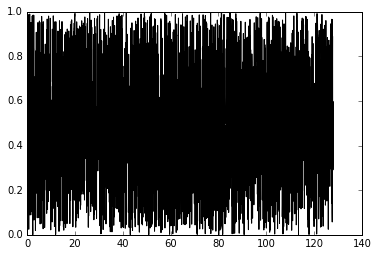

In [7]:
phi_rand = np.random.rand(10000, 2560)
plt.plot(t, phi_rand[0, :], c='k')

In [8]:
seuil = 140
r_rand, i_rand, c_rand, a_rand, phi_rand, aphi_rand, norm_r_rand, liste_rt_rand = fct_MP (signaux, phi_rand, seuil)
print (np.shape(i_rand)[0])

1306


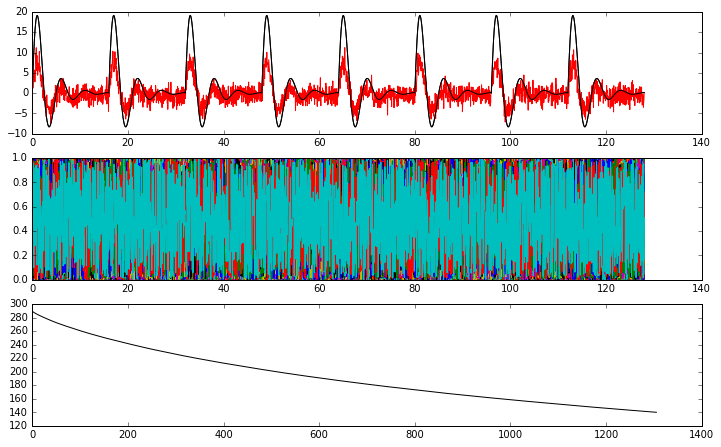

In [9]:
fig, axs = plt.subplots(3, 1, figsize=(12, 12/1.6180))

axs[0].plot(t, signaux, c='k')
axs[0].plot(t, r_rand, c='r')
axs[0].plot(t, sum(aphi_rand)+r_rand, c='k')

for x in range(np.shape(phi_rand)[0]) :
    axs[1].plot(t, phi_rand[x])

axs[2].plot(norm_r_rand, c='k')

## dictionnaire sinusoïde

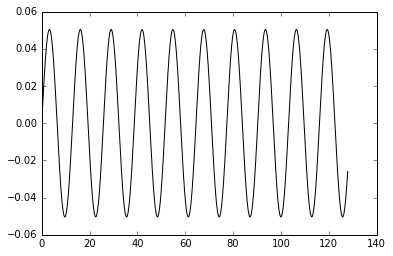

In [10]:
plt.plot(t, np.sin(t*np.random.rand())*np.random.rand(), c='k')

In [11]:
phi_sin = np.zeros((10000,2560))

for i in range(np.shape(phi_sin)[0]):
    phi_sin[i] = np.sin(np.arange(0,128,0.05)*np.random.rand())*np.random.rand()

In [12]:
seuil = 242
r_sin, i_sin, c_sin, a_sin, phi_sin, aphi_sin, norm_r_sin, liste_rt_sin = fct_MP (signaux, phi_sin, seuil)
print (np.shape(i_sin)[0])

32


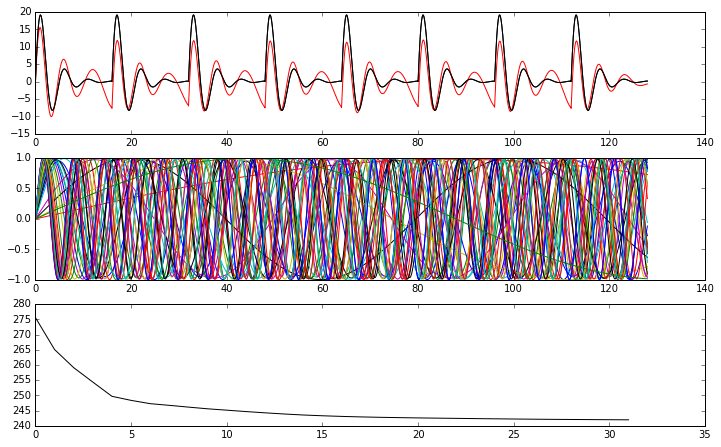

In [13]:
fig, axs = plt.subplots(3, 1, figsize=(12, 12/1.6180))

axs[0].plot(t, signaux, c='k')
axs[0].plot(t, r_sin, c='r')
axs[0].plot(t, sum(aphi_sin)+r_sin, c='k')

for x in range(np.shape(phi_sin)[0]) :
    axs[1].plot(t, phi_sin[x])

axs[2].plot(norm_r_sin, c='k')

## dictionnaire Gabor

In [14]:
def g (t, u, s, w, phase=0) :
    return np.exp(-np.pi*((t-u)/s)**2)*np.cos(w*(t-u)+phase)

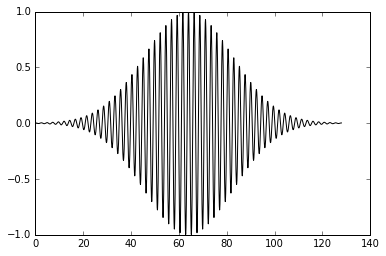

In [15]:
u, s, w = 64, 46, 500
plt.plot(t, g(t, u, s, w), c='k')

In [16]:
phi_gab = np.zeros((10000,2560))

for i in range(np.shape(phi_gab)[0]):
    phi_gab[i] = g (t, u=np.random.randint(128), s=np.random.randint(1, 50), w=np.random.randint(500))

In [17]:
seuil = 5
r_gab, i_gab, c_gab, a_gab, phi_gab, aphi_gab, norm_r_gab, liste_rt_gab = fct_MP (signaux, phi_gab, seuil)
print (np.shape(i_gab)[0])

1536


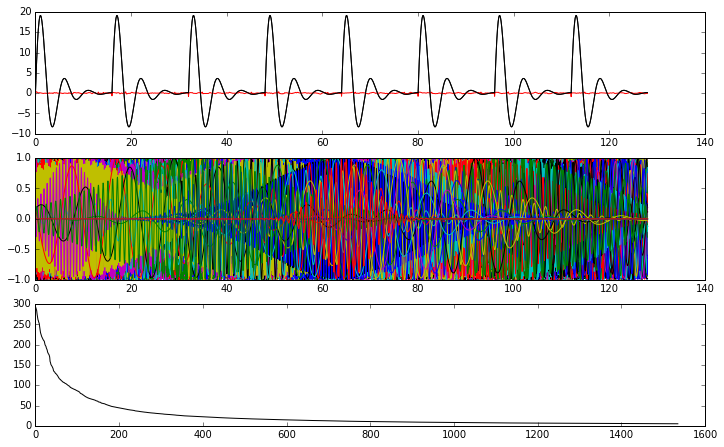

In [18]:
fig, axs = plt.subplots(3, 1, figsize=(12, 12/1.6180))

axs[0].plot(t, signaux, c='k')
axs[0].plot(t, r_gab, c='r')
axs[0].plot(t, sum(aphi_gab)+r_gab, c='k')

for x in range(np.shape(phi_gab)[0]) :
    axs[1].plot(t, phi_gab[x])
    
axs[2].plot(norm_r_gab, c='k')

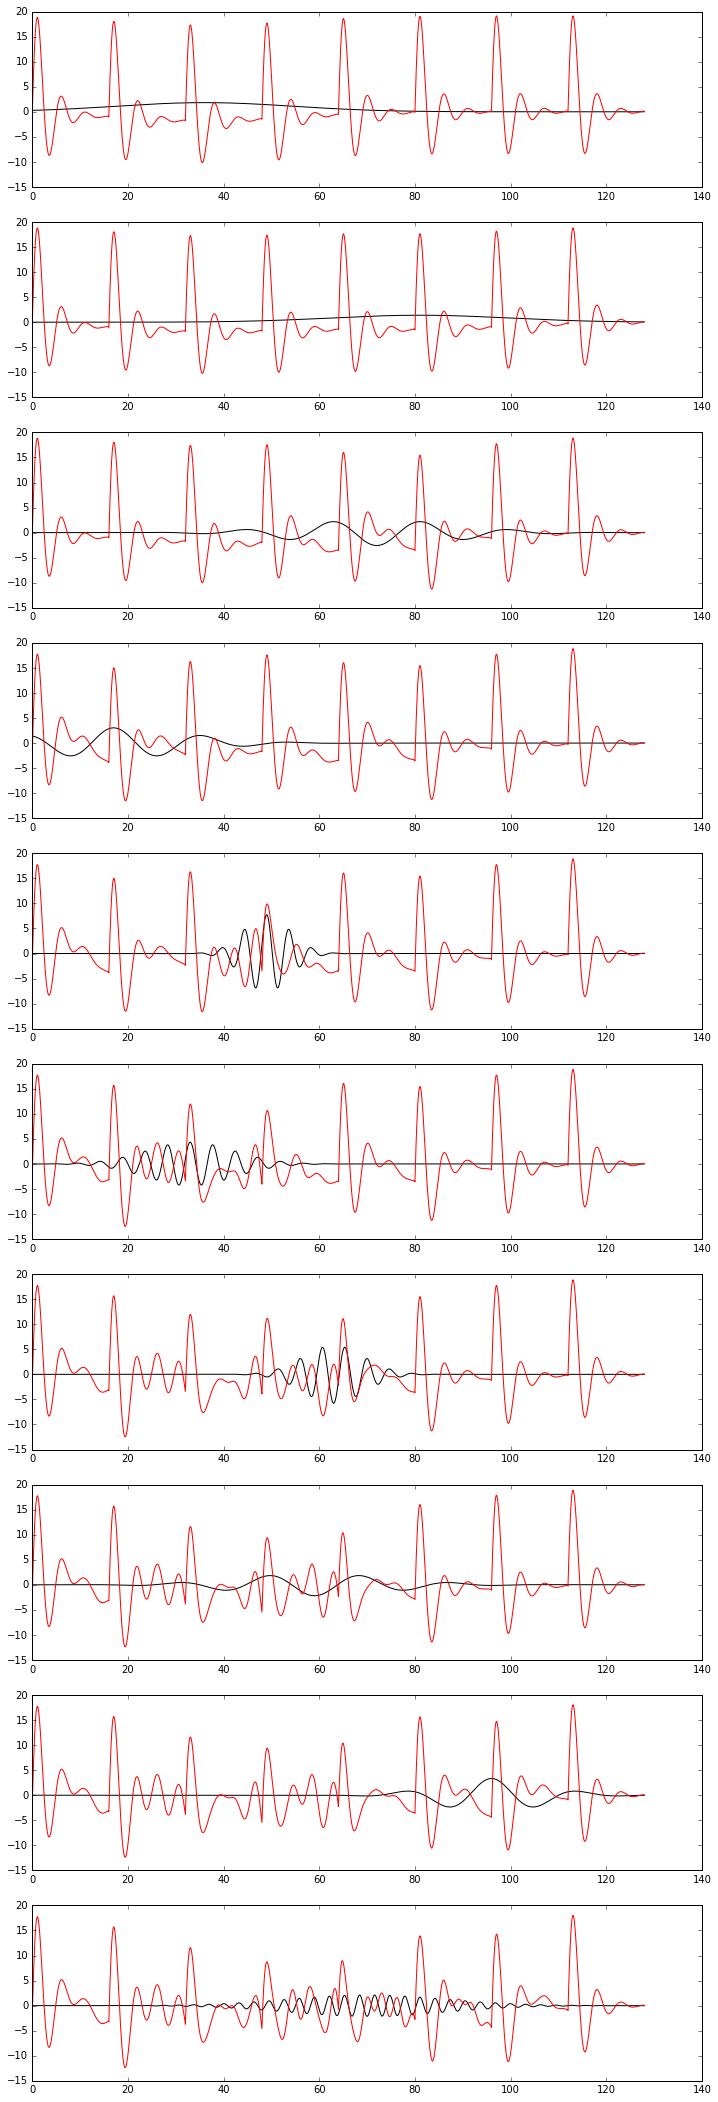

In [19]:
fig, axs = plt.subplots(10, 1, figsize=(12, 5*12/1.6180))

for x in range(10) :
    axs[x].plot(t, aphi_gab[x], c='k')
    axs[x].plot(t, liste_rt_gab[x], c='r')